In [1]:
# Section 6.1.4 continued

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Section 6.1.5

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [8]:
# Section 6.2.6

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=33304151a3b71e75b3669711447a8267


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | coihaique
Processing Record 12 of Set 1 | moose factory
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | yankton
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | saint-georges
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | rikitea
Processing Record

Processing Record 36 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 37 of Set 4 | kalabo
Processing Record 38 of Set 4 | bukama
Processing Record 39 of Set 4 | valdivia
Processing Record 40 of Set 4 | san policarpo
Processing Record 41 of Set 4 | coos bay
Processing Record 42 of Set 4 | tilichiki
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | san carlos de bariloche
Processing Record 46 of Set 4 | tsybli
Processing Record 47 of Set 4 | mersing
Processing Record 48 of Set 4 | delano
Processing Record 49 of Set 4 | bushehr
Processing Record 50 of Set 4 | hvammstangi
City not found. Skipping...
Processing Record 1 of Set 5 | xiaoweizhai
Processing Record 2 of Set 5 | mogpog
Processing Record 3 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 4 of Set 5 | nador
Processing Record 5 of Set 5 | touros
Processing Record 6 of Set 5 | albany
Processing Record 7 of Set 5 | aswan
Processing Record 

Processing Record 18 of Set 8 | khagrachari
City not found. Skipping...
Processing Record 19 of Set 8 | nuuk
Processing Record 20 of Set 8 | kupang
Processing Record 21 of Set 8 | gualaquiza
Processing Record 22 of Set 8 | tucuman
Processing Record 23 of Set 8 | ouesso
Processing Record 24 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 25 of Set 8 | soyo
Processing Record 26 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 27 of Set 8 | ende
Processing Record 28 of Set 8 | altamira
Processing Record 29 of Set 8 | san patricio
Processing Record 30 of Set 8 | sharan
Processing Record 31 of Set 8 | tautira
Processing Record 32 of Set 8 | turochak
Processing Record 33 of Set 8 | yuli
Processing Record 34 of Set 8 | kudahuvadhoo
Processing Record 35 of Set 8 | beloha
Processing Record 36 of Set 8 | richards bay
Processing Record 37 of Set 8 | mayor pablo lagerenza
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | geraldton
Processin

Processing Record 6 of Set 12 | lumeje
Processing Record 7 of Set 12 | rovaniemi
Processing Record 8 of Set 12 | kichera
Processing Record 9 of Set 12 | big spring
Processing Record 10 of Set 12 | kailua
Processing Record 11 of Set 12 | vite
Processing Record 12 of Set 12 | opportunity
Processing Record 13 of Set 12 | lazaro cardenas
Processing Record 14 of Set 12 | kulhudhuffushi
Processing Record 15 of Set 12 | awjilah
Processing Record 16 of Set 12 | roald
Processing Record 17 of Set 12 | plettenberg bay
Processing Record 18 of Set 12 | amapa
Processing Record 19 of Set 12 | kariba
Processing Record 20 of Set 12 | dingle
Processing Record 21 of Set 12 | bongandanga
Processing Record 22 of Set 12 | cayenne
Processing Record 23 of Set 12 | gonbad-e qabus
Processing Record 24 of Set 12 | kokopo
Processing Record 25 of Set 12 | abu kamal
Processing Record 26 of Set 12 | orchard homes
Processing Record 27 of Set 12 | warrnambool
Processing Record 28 of Set 12 | maceio
Processing Record 2

In [13]:
# Section 6.2.7

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,72.03,20,17,7.05,RU,2021-06-02 04:21:17
1,Avarua,-21.2078,-159.7750,77.05,69,99,4.61,CK,2021-06-02 04:21:17
2,Klaksvik,62.2266,-6.5890,47.32,87,74,9.53,FO,2021-06-02 04:21:17
3,Hobart,-42.8794,147.3294,60.66,52,0,3.00,AU,2021-06-02 04:16:50
4,Upernavik,72.7868,-56.1549,25.34,92,28,7.56,GL,2021-06-02 04:21:18
5,Ushuaia,-54.8000,-68.3000,29.86,100,75,12.66,AR,2021-06-02 04:20:47
6,Kaitangata,-46.2817,169.8464,54.93,66,81,5.19,NZ,2021-06-02 04:21:19
7,Jamestown,42.0970,-79.2353,58.33,80,100,2.98,US,2021-06-02 04:18:24
8,Talnakh,69.4865,88.3972,35.55,88,100,16.71,RU,2021-06-02 04:21:19
9,Nikolskoye,59.7035,30.7861,52.39,59,5,2.62,RU,2021-06-02 04:21:20


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
# Assign city_data_df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-06-02 04:21:17,70.6333,147.9167,72.03,20,17,7.05
1,Avarua,CK,2021-06-02 04:21:17,-21.2078,-159.7750,77.05,69,99,4.61
2,Klaksvik,FO,2021-06-02 04:21:17,62.2266,-6.5890,47.32,87,74,9.53
3,Hobart,AU,2021-06-02 04:16:50,-42.8794,147.3294,60.66,52,0,3.00
4,Upernavik,GL,2021-06-02 04:21:18,72.7868,-56.1549,25.34,92,28,7.56
...,...,...,...,...,...,...,...,...,...
546,Benghazi,LY,2021-06-02 04:26:13,32.1167,20.0667,69.73,61,32,8.34
547,Mahibadhoo,MV,2021-06-02 04:26:33,3.7833,72.9667,83.88,62,81,13.18
548,Birjand,IR,2021-06-02 04:26:33,32.8663,59.2211,88.27,9,0,9.22
549,Sept-Iles,CA,2021-06-02 04:26:34,50.2001,-66.3821,54.12,86,75,6.91


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Section 6.3.1

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

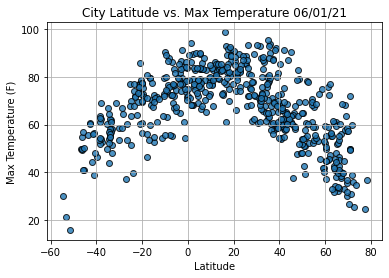

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [21]:
# Section 6.3.2

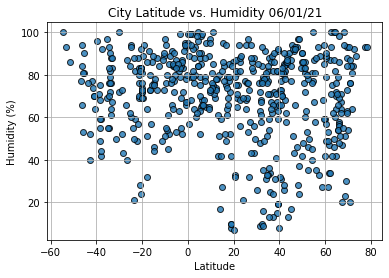

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [23]:
# Section 6.3.3

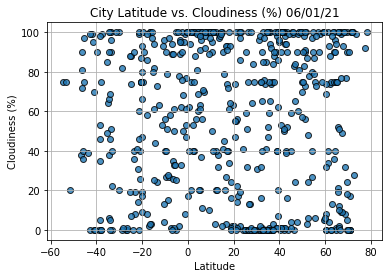

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [25]:
# Section 6.3.4

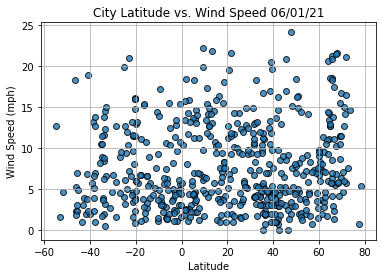

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Section 6.4.2

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                      Yankton
Country                        US
Date          2021-06-02 04:21:22
Lat                       42.8711
Lng                      -97.3973
Max Temp                    61.45
Humidity                       62
Cloudiness                     40
Wind Speed                   8.59
Name: 13, dtype: object

In [31]:
# Getting all Northern Hemisphere latitudes, for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
546     True
547     True
548     True
549     True
550     True
Name: Lat, Length: 551, dtype: bool

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-06-02 04:21:17,70.6333,147.9167,72.03,20,17,7.05
2,Klaksvik,FO,2021-06-02 04:21:17,62.2266,-6.5890,47.32,87,74,9.53
4,Upernavik,GL,2021-06-02 04:21:18,72.7868,-56.1549,25.34,92,28,7.56
7,Jamestown,US,2021-06-02 04:18:24,42.0970,-79.2353,58.33,80,100,2.98
8,Talnakh,RU,2021-06-02 04:21:19,69.4865,88.3972,35.55,88,100,16.71


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [34]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-06-02 04:21:17,70.6333,147.9167,72.03,20,17,7.05
2,Klaksvik,FO,2021-06-02 04:21:17,62.2266,-6.5890,47.32,87,74,9.53
4,Upernavik,GL,2021-06-02 04:21:18,72.7868,-56.1549,25.34,92,28,7.56
7,Jamestown,US,2021-06-02 04:18:24,42.0970,-79.2353,58.33,80,100,2.98
8,Talnakh,RU,2021-06-02 04:21:19,69.4865,88.3972,35.55,88,100,16.71
...,...,...,...,...,...,...,...,...,...
546,Benghazi,LY,2021-06-02 04:26:13,32.1167,20.0667,69.73,61,32,8.34
547,Mahibadhoo,MV,2021-06-02 04:26:33,3.7833,72.9667,83.88,62,81,13.18
548,Birjand,IR,2021-06-02 04:26:33,32.8663,59.2211,88.27,9,0,9.22
549,Sept-Iles,CA,2021-06-02 04:26:34,50.2001,-66.3821,54.12,86,75,6.91


In [35]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Avarua,CK,2021-06-02 04:21:17,-21.2078,-159.7750,77.05,69,99,4.61
3,Hobart,AU,2021-06-02 04:16:50,-42.8794,147.3294,60.66,52,0,3.00
5,Ushuaia,AR,2021-06-02 04:20:47,-54.8000,-68.3000,29.86,100,75,12.66
6,Kaitangata,NZ,2021-06-02 04:21:19,-46.2817,169.8464,54.93,66,81,5.19
10,Coihaique,CL,2021-06-02 04:21:21,-45.5752,-72.0662,40.95,81,75,6.91
...,...,...,...,...,...,...,...,...,...
532,Benguela,AO,2021-06-02 04:26:07,-12.5763,13.4055,70.56,84,63,4.25
533,Pangkalanbuun,ID,2021-06-02 04:26:08,-2.6833,111.6167,91.04,52,90,4.27
538,Perdoes,BR,2021-06-02 04:26:10,-21.0908,-45.0914,60.39,82,26,1.52
539,Boende,CD,2021-06-02 04:26:10,-0.2167,20.8667,70.39,80,100,3.04


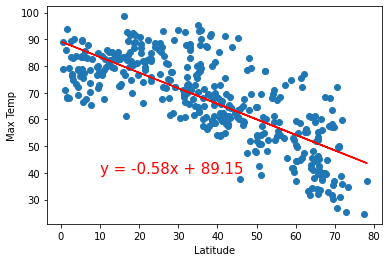

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

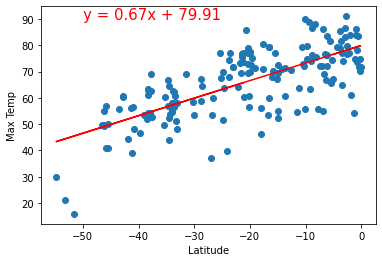

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [38]:
# Section 6.4.3

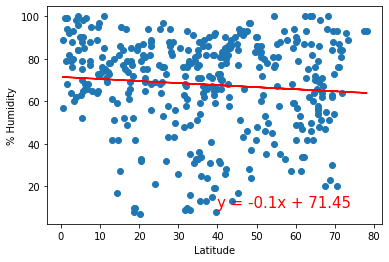

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

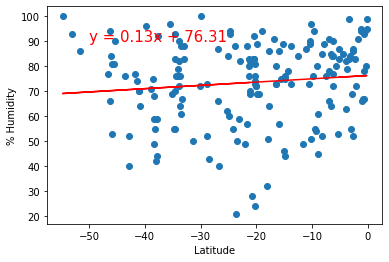

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,90))

In [43]:
# Section 6.4.4

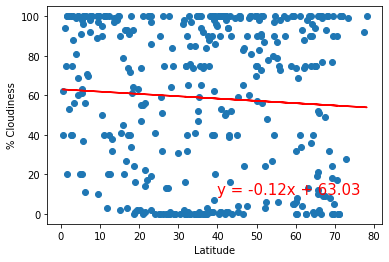

In [46]:
# Linear regression on the Nouthern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nouthern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

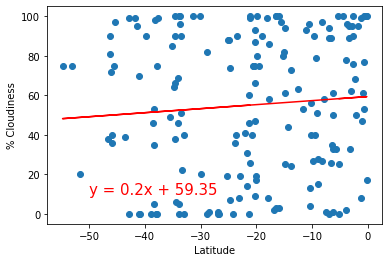

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50, 10))

In [53]:
# Section 6.4.5

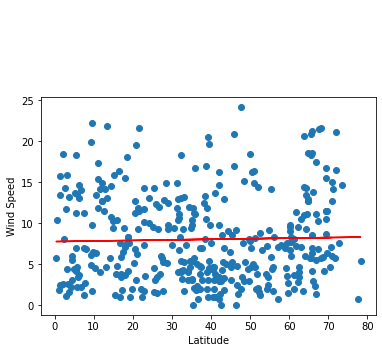

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

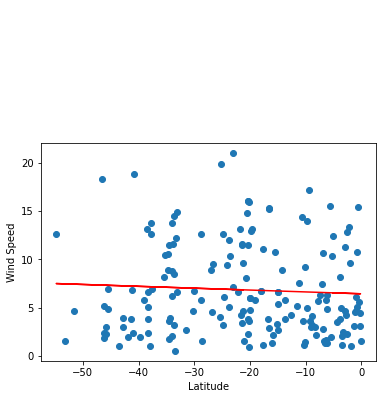

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))